In [20]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

In [21]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [23]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [24]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [25]:
len(data)

149

In [26]:
data[0]

array([[[  35.,   65.],
        [ 125.,  -58.],
        [-258.,  639.]],

       [[-161.,  110.],
        [ -48.,   31.],
        [-246.,  642.]],

       [[-168.,  151.],
        [-246.,  190.],
        [-152.,  610.]],

       [[ -73.,  145.],
        [-171.,  208.],
        [ -34.,  533.]],

       [[ -40.,  162.],
        [ -57.,  190.],
        [ 178.,  145.]],

       [[-146.,  161.],
        [-283.,  234.],
        [ -52.,  392.]],

       [[-156.,  114.],
        [ -54.,    7.],
        [-177.,  627.]]])

In [27]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [28]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=1)
Y = np.delete(Y, 0, axis=1)

In [29]:
Y.shape

(149, 6, 3, 2)

In [30]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test[0]
Y_test=Y_test[0]

In [37]:
index = 1
points = restore_changes(X[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue0
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/ori/output{n}.png', img)

In [12]:
X_test.shape

(6, 3, 2)

### test

In [13]:
X = np.array([X[0]])
Y = np.array([Y[0]])
X_test = X[0]
Y_test = Y[0]

In [14]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
minimum_loss = float('inf')
for epoch in range(2000):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)
    l0.append(model.evaluate(X_test, Y_test))
    if l0[-1] < minimum_loss:
            minimum_loss = l0[-1]
            model.save('best.h5')

2024-08-17 00:00:12.647398: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-17 00:00:12.647460: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-17 00:00:12.647480: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-17 00:00:12.794875: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-17 00:00:12.794936: I external/local_xla/xla/stream_executor

_device.cc:2022] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-08-17 00:00:12.794975: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-17 00:00:12.794994: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13717 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2024-08-17 00:00:13.322419: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2024-08-17 00:00:14.435998: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd460efc570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-17 00:00:14

1/1 [==============================] - 0s 28ms/step - loss: 131428.3594


/home/itachi/miniconda3/envs/kera/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 19ms/step - loss: 2.2221e-07


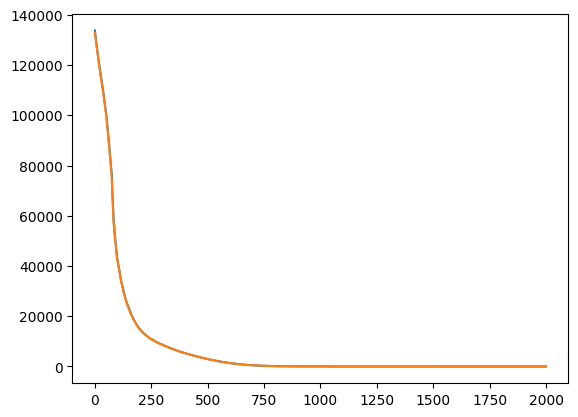

In [15]:
plt.plot(l)
plt.plot(l0)
plt.show()

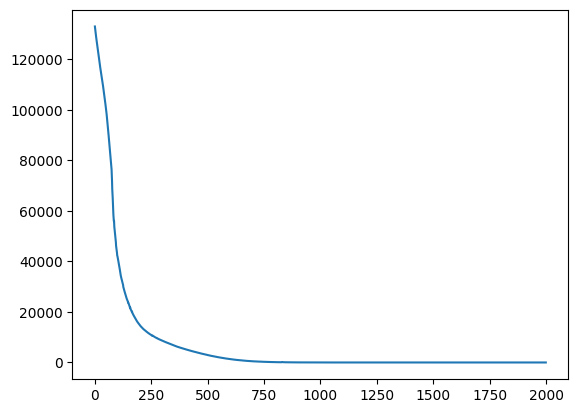

In [16]:
plt.plot(l0)

In [17]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

best epoch: 2.1524950000184617e-07 best batch: 2.1524950000184617e-07


In [18]:
l0[-1]

2.2220574180664698e-07

In [19]:
model.save('last.h5')

In [20]:
data[0]

array([[[ 231.,  196.],
        [-173.,  225.],
        [-301.,   27.]],

       [[ 522.,  245.],
        [ 312.,  645.],
        [ 246.,  394.]],

       [[-279.,  173.],
        [  18.,  274.],
        [ 243., -165.]],

       [[-278.,  236.],
        [ -15.,  252.],
        [ 119.,  575.]],

       [[-333.,  538.],
        [-755.,  573.],
        [ 187.,  872.]],

       [[-482.,  177.],
        [-439.,  231.],
        [  37., -156.]],

       [[ -48.,  291.],
        [ 119.,  294.],
        [ -39.,   75.]]])

In [21]:
restore_changes(data[0],0,None)

[[[1079.0, 706.0], [675.0, 735.0], [547.0, 537.0]],
 [[1065.0, 727.0], [855.0, 1127.0], [789.0, 876.0]],
 [[372.0, 690.0], [669.0, 791.0], [894.0, 352.0]],
 [[215.0, 620.0], [478.0, 636.0], [612.0, 959.0]],
 [[436.0, 708.0], [14.0, 743.0], [956.0, 1042.0]],
 [[291.0, 763.0], [334.0, 817.0], [810.0, 430.0]],
 [[705.0, 791.0], [872.0, 794.0], [714.0, 575.0]]]

In [22]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [23]:
# restore_changes(data[0],0)

In [24]:
model = tf.keras.models.load_model('best.h5')
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 126ms/step - loss: 2.1525e-07


2.1524950000184617e-07

In [25]:
a= model.predict(data[0]).tolist()

1/1 [==============================] - 0s 130ms/step


In [26]:
a[0]

[[521.99755859375, 245.0003204345703],
 [312.0000305175781, 645.0000610351562],
 [246.00003051757812, 394.0]]

In [27]:
data[0]

array([[[ 231.,  196.],
        [-173.,  225.],
        [-301.,   27.]],

       [[ 522.,  245.],
        [ 312.,  645.],
        [ 246.,  394.]],

       [[-279.,  173.],
        [  18.,  274.],
        [ 243., -165.]],

       [[-278.,  236.],
        [ -15.,  252.],
        [ 119.,  575.]],

       [[-333.,  538.],
        [-755.,  573.],
        [ 187.,  872.]],

       [[-482.,  177.],
        [-439.,  231.],
        [  37., -156.]],

       [[ -48.,  291.],
        [ 119.,  294.],
        [ -39.,   75.]]])

In [1]:
points = restore_changes(a,0,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue
    img = cv2.imread(f'./CutFrame_Output/output0/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/output{n}.png', img)

NameError: name 'restore_changes' is not defined